In [2]:
%pylab inline
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pickle

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [5]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

In [6]:
scipy.__version__

'1.0.0'

In [7]:
sns.__version__

'0.8.1'

In [8]:
matplotlib.__version__

'2.2.2'

In [9]:
print(rf'{ainv:4.1f} GeV')
print(rf'{lat_unit:4.4f} fm')

2194.0 GeV
0.0899 fm


# data

In [10]:
with open('../data/Rcorr/Rcorr_jk_1s0_xixi_L64.pkl', 'rb') as fin:
    doc, rsq, Rcorr_jk = pickle.load(fin)

In [11]:
print(doc)

jack-knife samples (20) of Rcorr using wall and smeared src. for L = 64 from t = 10-18
 and r = sqrt(x^2 + y^2 + z^2) 0 <= z <= y <= x <= L/2


In [12]:
its = list(Rcorr_jk['wall'].keys())
binNum = Rcorr_jk['wall'][its[0]].shape[0]

# average and error

In [13]:
waves = {}
wave_errs = {}
for src in ['wall', 'exp']:
    for it in its:
        waves[(src,it)] = Rcorr_jk[src][it].mean(axis=0)
        wave_errs[(src,it)] = Rcorr_jk[src][it].std(axis=0) * np.sqrt(binNum - 1)

# plot

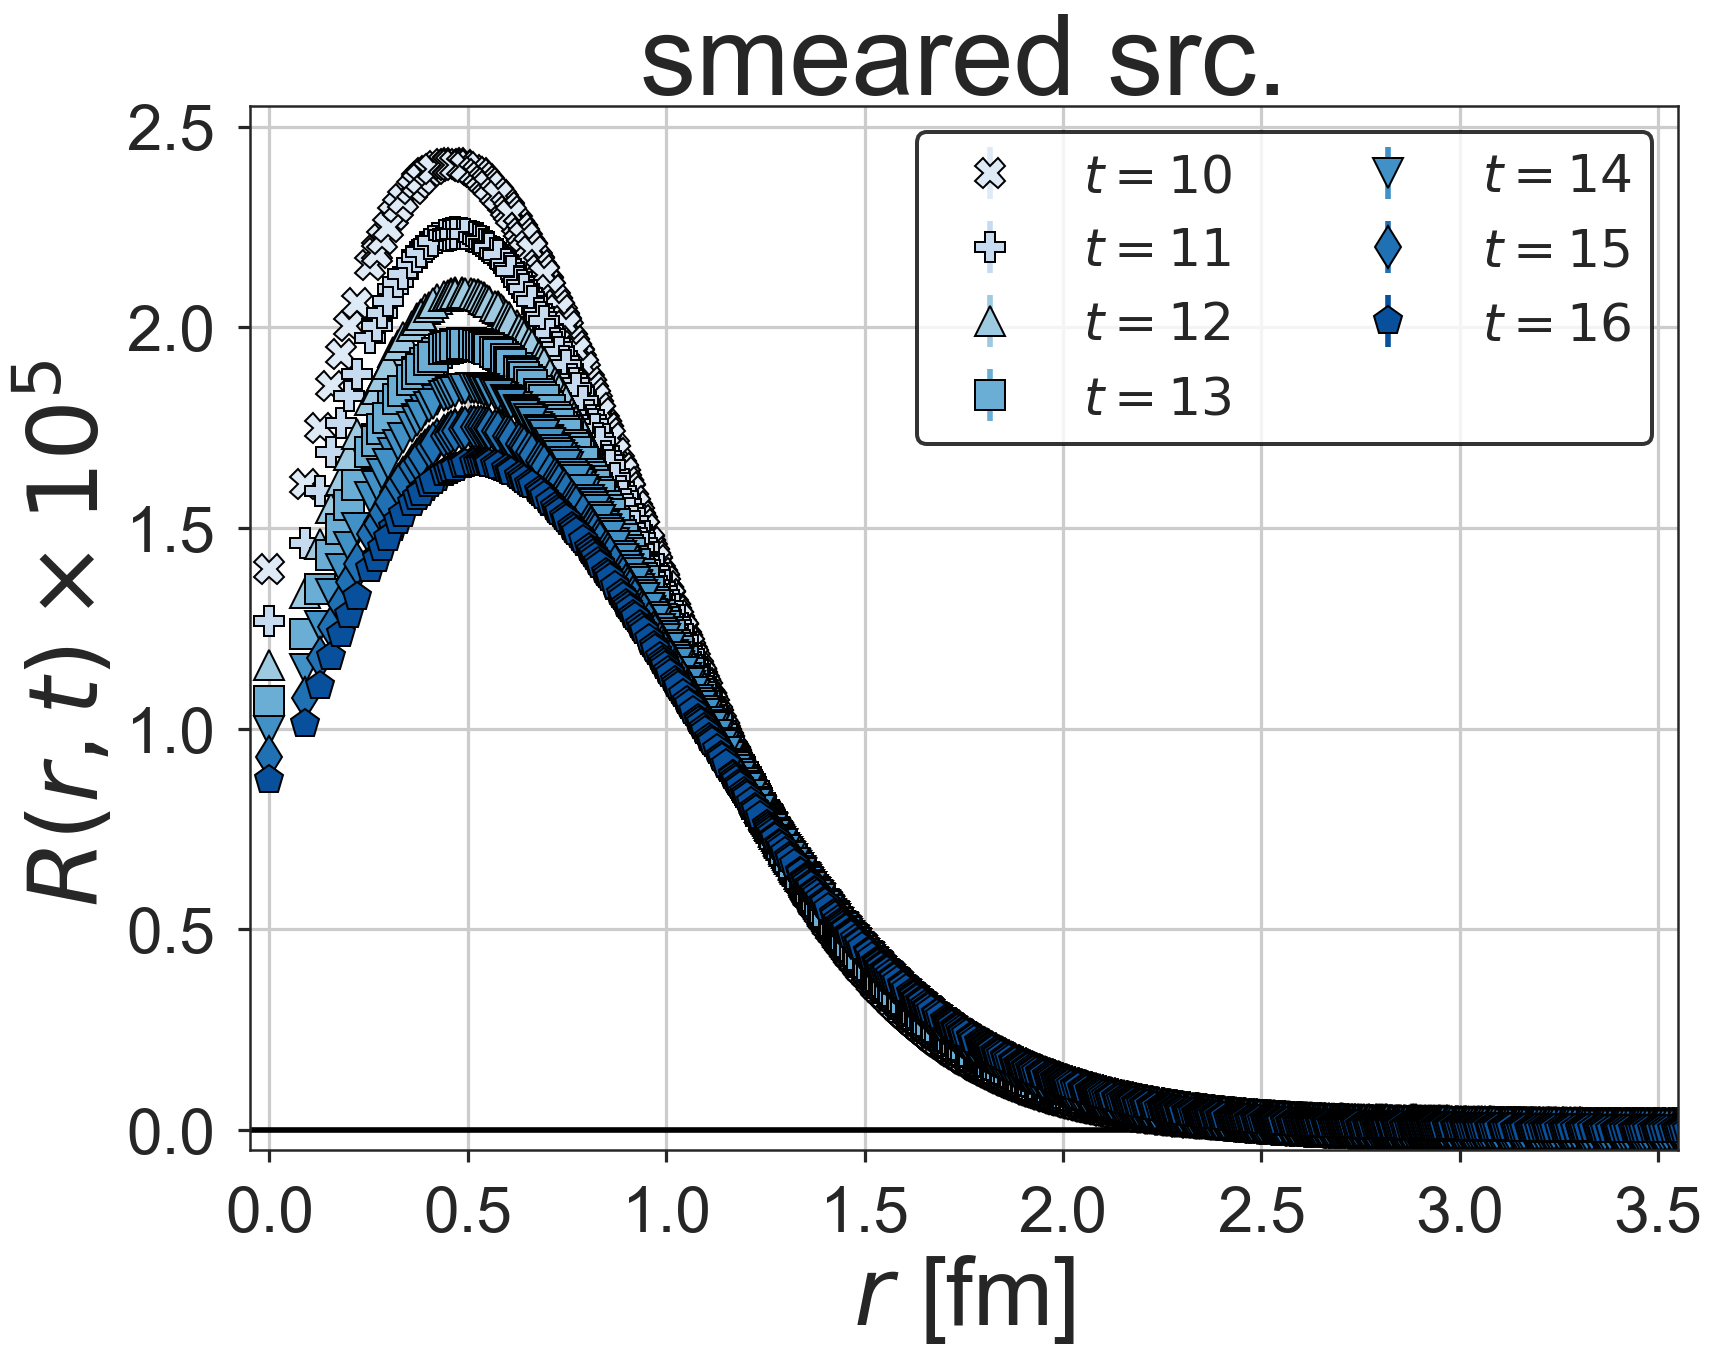

In [19]:
fac = 1.0e5
ts = [10, 11, 12, 13, 14, 15, 16]

sns.set_palette(sns.color_palette('Blues', len(ts)))

fig, ax = plt.subplots()
src = 'exp'
for it, sym in zip(ts, ['X', 'P', '^', 's', 'v', 'd', 'p', 'o']):
    ax.errorbar(rsq*lat_unit, waves[(src,it)]*fac, wave_errs[(src,it)]*fac,
                ms=15, fmt=sym, mew=1, mec='black', label=rf'$t = {it}$')
    
ax.set_title('smeared src.', fontsize=56)
ax.set_xlim(-0.05,3.55)
ax.set_xticks([0, 0.5,1.0,1.5, 2.0, 2.5, 3.0, 3.5])
ax.set_ylim(-0.05, 2.55)

ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', fontsize=48)
ax.set_ylabel(r'$R(r,t) \times 10^5$ ', fontsize=48)
leg = ax.legend(loc='upper right', ncol=2, frameon=True, fontsize=26)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.grid()
fig.savefig('../figs/Rcorr/Rcorr_smeared_64_t_dep.png', bbox_inches='tight')

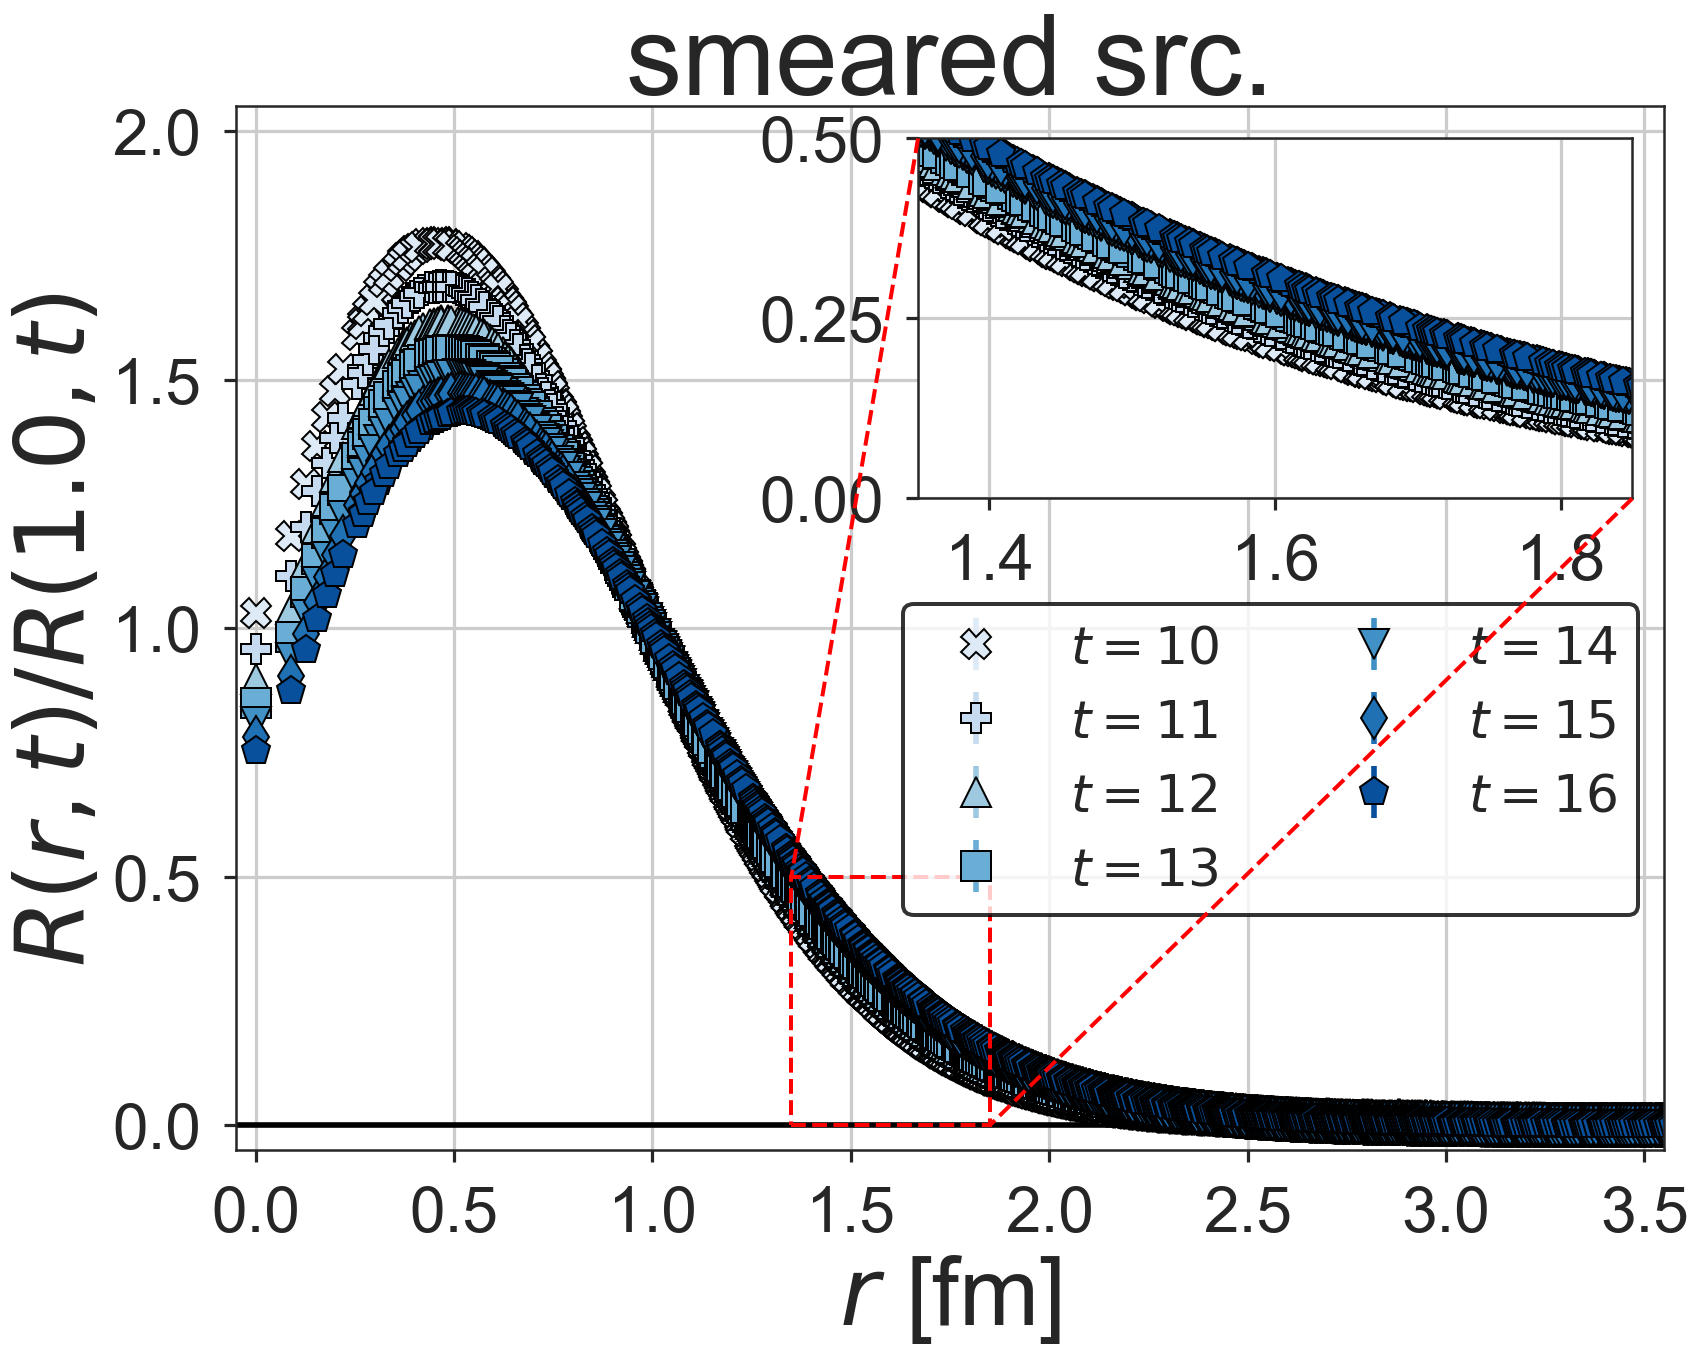

In [20]:
fac = 1.0e5
ts = [10, 11, 12, 13, 14, 15, 16]

sns.set_palette(sns.color_palette('Blues', len(ts)))

fig, ax = plt.subplots()
src = 'exp'
ref_point = 1.0
ind_norm = np.argmin(np.abs(rsq*lat_unit - ref_point))
for it, sym in zip(ts, ['X', 'P', '^', 's',
                        'v', 'd', 'p', 'o']):
    norm = waves[(src,it)][ind_norm]
    ax.errorbar(rsq*lat_unit, waves[(src,it)]/norm, wave_errs[(src,it)]/norm,
                ms=15,
        fmt=sym, mew=1, mec='black', label=rf'$t = {it}$')
axins = inset_axes(ax, width='50%', height=2.5, loc=1)

for it, sym in zip(ts, ['X', 'P', '^', 's',
                        'v', 'd', 'p', 'o']):
    norm = waves[(src,it)][ind_norm]
    axins.errorbar(rsq*lat_unit, waves[(src,it)]/norm, wave_errs[(src,it)]/norm,
                ms=15,
        fmt=sym, mew=1, mec='black')

ax.set_title('smeared src.', fontsize=56)
ax.set_xlim(-0.05,3.55)
ax.set_xticks([0, 0.5, 1.0,1.5, 2.0, 2.5, 3.0, 3.5])
ax.set_ylim(-0.05,2.05)
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='red', ls='--', linewidth=2,
          zorder=3)

ax.axhline(0, color='black')

ax.set_xlabel(r'$r$ [fm]', fontsize=48)
ax.set_ylabel(r'$R(r,t)/R({},t)$'.format(ref_point), fontsize=48)
leg = ax.legend(loc='lower right',
    bbox_to_anchor=(1, 0.2),
    ncol=2, frameon=True, fontsize=26)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.grid()

axins.set_xlim(1.35, 1.85)
axins.set_ylim(0., 0.5)
axins.grid()

fig.savefig('../figs/Rcorr/Rcorr_smeared_64_t_dep_rescaled.png', bbox_inches='tight')

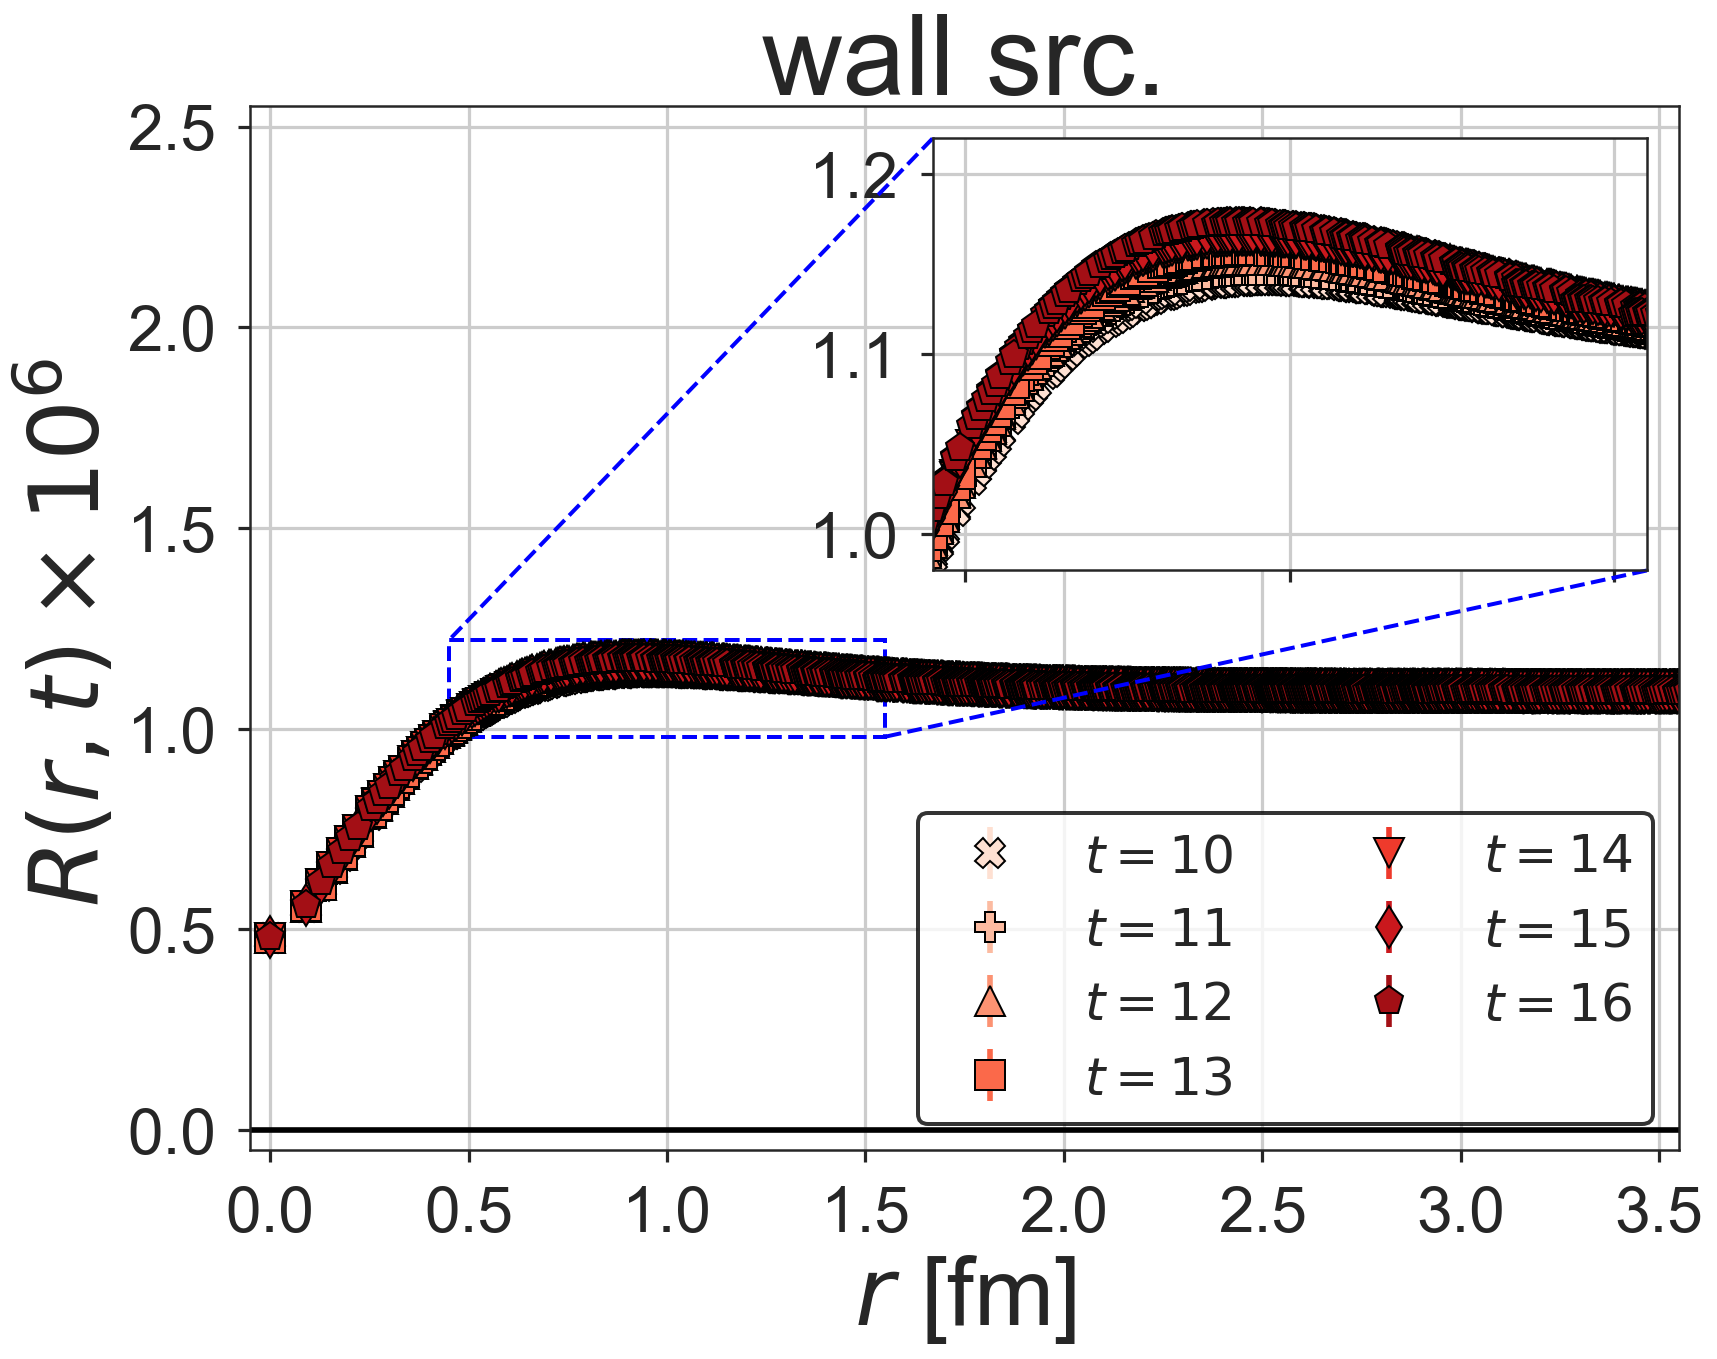

In [21]:
fac = 1.0e6
ts = [10, 11, 12, 13, 14, 15, 16]
sns.set_palette(sns.color_palette('Reds', len(ts)))

fig, ax = plt.subplots()
src = 'wall'
for it, sym in zip(ts, ['X', 'P', '^', 's',
                        'v', 'd', 'p', 'o']):
    ax.errorbar(rsq*lat_unit, waves[(src,it)]*fac, wave_errs[(src,it)]*fac,
                ms=15, fmt=sym, mew=1.0, mec='black', label=rf'$t = {it}$')
    
axins = inset_axes(ax, width='50%', height=3., loc=1)

for it, sym in zip(ts, ['X', 'P', '^', 's', 'v', 'd', 'p', 'o']):
    axins.errorbar(rsq*lat_unit, waves[(src,it)]*fac, wave_errs[(src,it)]*fac,
                ms=15, fmt=sym, mew=1.0, mec='black')

axins.set_ylim(0.98, 1.22)
axins.set_xlim(0.45, 1.55)
axins.set_xticks([0.50, 1.0, 1.5])
axins.set_xticklabels([])
axins.grid()
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='blue', ls='--', linewidth=2)

ax.set_title('wall src.', fontsize=56)
ax.set_xlim(-0.05,3.55)
ax.set_xticks([0,0.5,1.0,1.5, 2.0, 2.5, 3.0, 3.5])
ax.set_ylim(-0.05, 2.55)
ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', fontsize=48)
ax.set_ylabel(r'$R(r,t) \times 10^6$ ', fontsize=48)
leg = ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=26)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.grid()
fig.savefig('../figs/Rcorr/Rcorr_wall_64_t_dep.png', bbox_inches='tight')

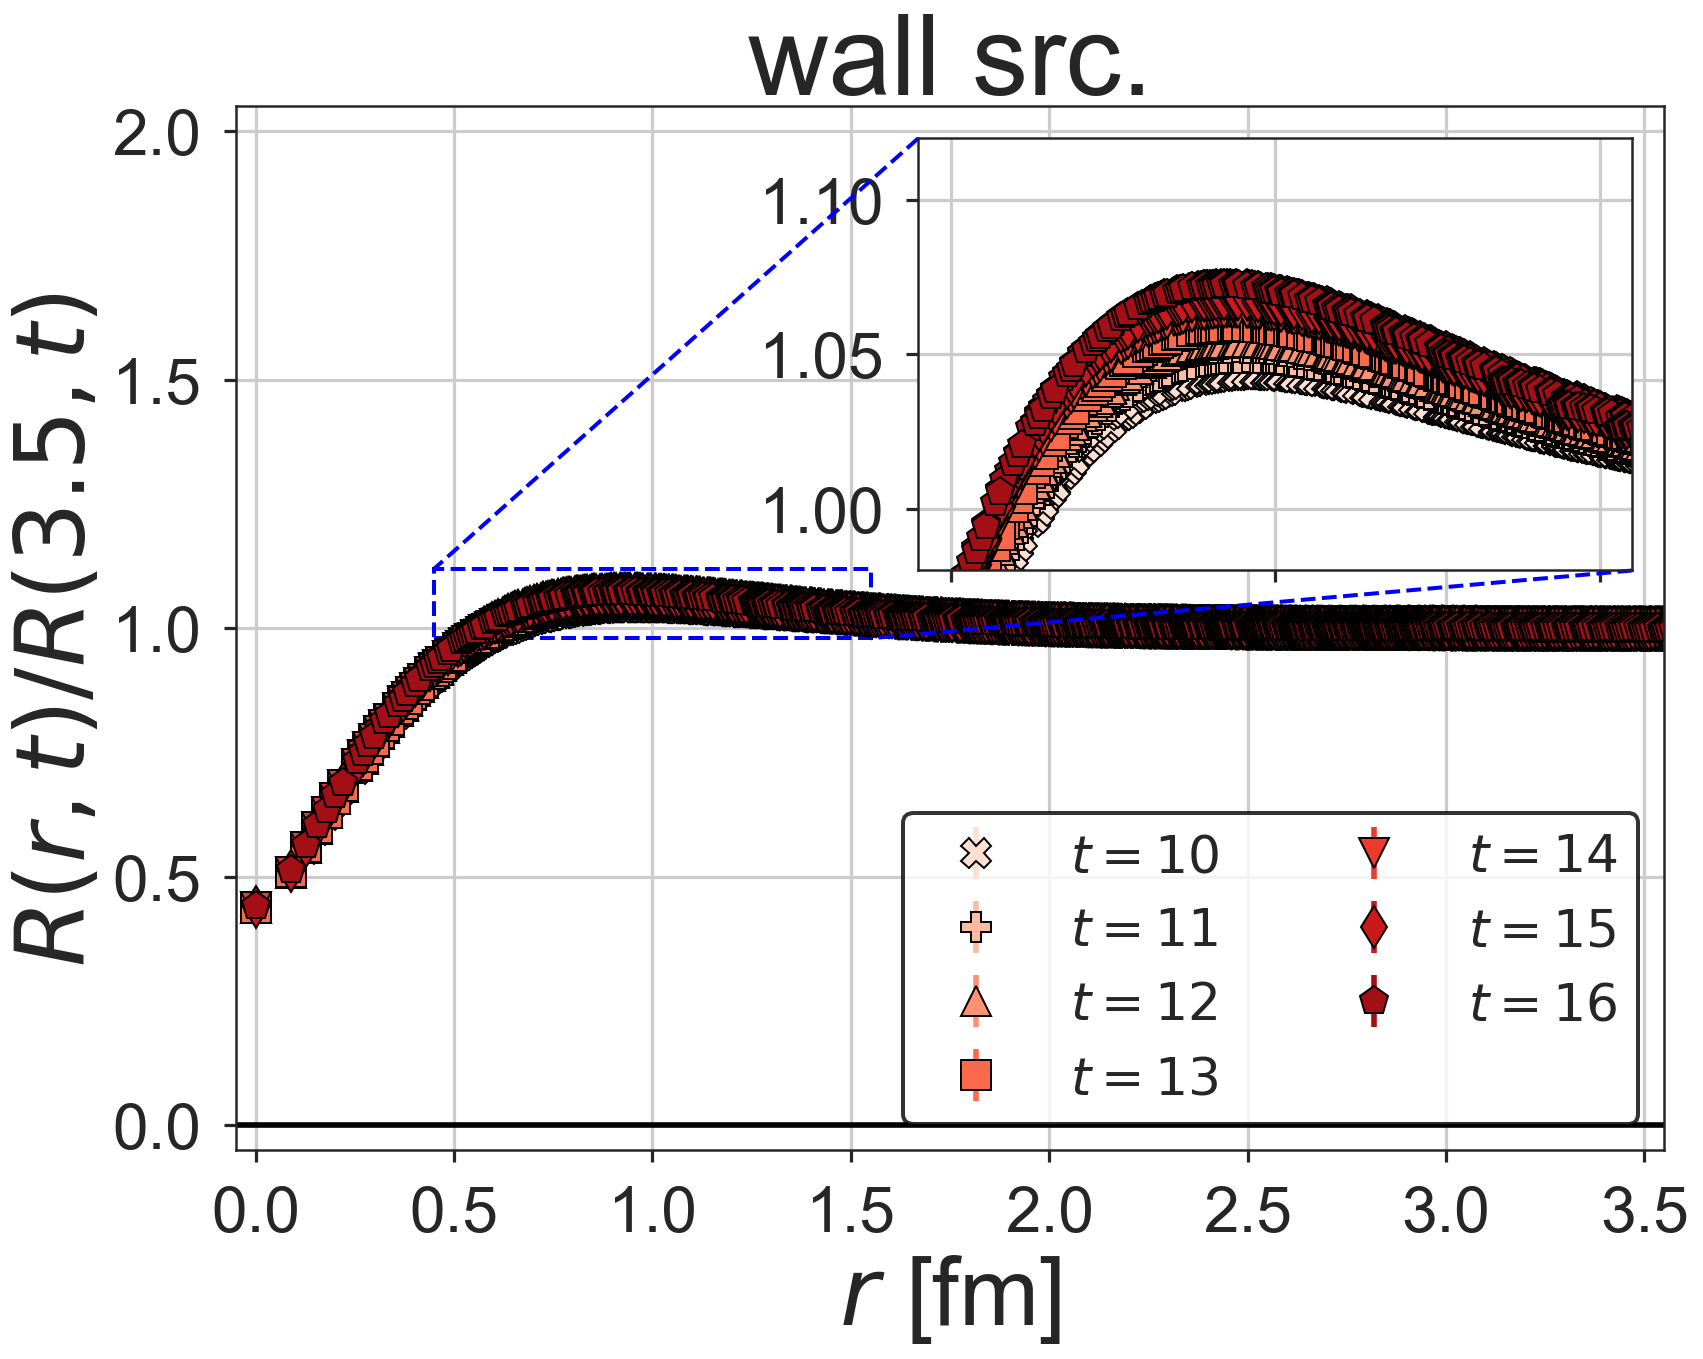

In [22]:
fac = 1.0e6
ts = [10, 11, 12, 13, 14, 15, 16]

sns.set_palette(sns.color_palette('Reds', len(ts)))

fig, ax = plt.subplots()
src = 'wall'
ref_point = 3.5
ind_norm = np.argmin(np.abs(rsq*lat_unit - ref_point))

for it, sym in zip(ts, ['X', 'P', '^', 's',
                        'v', 'd', 'p', 'o']):
    norm = waves[(src,it)][ind_norm]
    ax.errorbar(rsq*lat_unit, waves[(src,it)]/norm, wave_errs[(src,it)]/norm,
                ms=15, fmt=sym, mew=1.0, mec='black', label=rf'$t = {it}$')
    
    
axins = inset_axes(ax, width='50%', height=3., loc=1)

for it, sym in zip(ts, ['X', 'P', '^', 's', 'v', 'd', 'p', 'o']):
    norm = waves[(src,it)][ind_norm]

    axins.errorbar(rsq*lat_unit, waves[(src,it)]/norm, wave_errs[(src,it)]/norm,
                ms=15, fmt=sym, mew=1.0, mec='black')

axins.set_ylim(0.98, 1.12)
axins.set_xlim(0.45, 1.55)
axins.set_xticks([0.50, 1.0, 1.5])
axins.set_xticklabels([])
axins.grid()
mark_inset(ax, axins, loc1=2, loc2=4, fc='none', ec='blue', ls='--', linewidth=2)

#ax.axvline(ref_point, color='red')
ax.set_title('wall src.', fontsize=56)
ax.set_xlim(-0.05,3.55)
ax.set_xticks([0, 0.5,1.0,1.5, 2.0, 2.5, 3.0, 3.5])
ax.set_ylim(-0.05, 2.05)
ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', fontsize=48)
ax.set_ylabel(r'$R(r,t)/R({},t)$'.format(ref_point), fontsize=48)
leg = ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=26)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.grid()
fig.savefig('../figs/Rcorr/Rcorr_wall_64_t_dep_rescaled.png', bbox_inches='tight')